In [14]:
import pandas as pd

# Adjust the delimiter based on your file's structure
df_merged = pd.read_csv('this_is_it.csv', delimiter=',')

# Display the first few rows
print(df_merged.head())

                                Name  Min Players  Max Players  Play Time  \
0                         Gloomhaven            1            4        120   
1          Pandemic Legacy: Season 1            2            4         60   
2                  Brass: Birmingham            2            4        120   
3                  Terraforming Mars            1            5        120   
4  Twilight Imperium: Fourth Edition            3            6        480   

   Min Age  Users Rated  Rating Average  Complexity Average  Owned Users  \
0       14        42055            8.79                3.86        68323   
1       13        41643            8.61                2.84        65294   
2       14        19217            8.66                3.91        28785   
3       12        64864            8.43                3.24        87099   
4       14        13468            8.70                4.22        16831   

          Domain1  ...  Most Notable Genre  Most Notable Mechanic   Price  \
0  

In [15]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21186 entries, 0 to 21185
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   21186 non-null  object 
 1   Min Players            21186 non-null  int64  
 2   Max Players            21186 non-null  int64  
 3   Play Time              21186 non-null  int64  
 4   Min Age                21186 non-null  int64  
 5   Users Rated            21186 non-null  int64  
 6   Rating Average         21186 non-null  float64
 7   Complexity Average     21186 non-null  float64
 8   Owned Users            21186 non-null  int64  
 9   Domain1                21186 non-null  object 
 10  above_average          21186 non-null  bool   
 11  Bayesian Average       21186 non-null  float64
 12  Most Notable Genre     21186 non-null  object 
 13  Most Notable Mechanic  21186 non-null  object 
 14  Price                  21186 non-null  float64
 15  pc

In [16]:
null_counts = df_merged.isnull().sum()
print(null_counts)

Name                     0
Min Players              0
Max Players              0
Play Time                0
Min Age                  0
Users Rated              0
Rating Average           0
Complexity Average       0
Owned Users              0
Domain1                  0
above_average            0
Bayesian Average         0
Most Notable Genre       0
Most Notable Mechanic    0
Price                    0
pct_rated                0
bayes_above_average      0
Year Published           0
Owned_Bool               0
Year Offset              0
Owned_Per_Year           0
perYear_Bool             0
dtype: int64


In [17]:
df_merged['Owned_Bool'].value_counts()

Owned_Bool
False    10614
True     10572
Name: count, dtype: int64

In [18]:
#
# print(df_merged['Bayesian Average'].describe())

In [19]:
"""
df_owned = df_merged[df_merged['Bayesian Average'].between(5.27, 5.91)]
df_owned.info()
"""

"\ndf_owned = df_merged[df_merged['Bayesian Average'].between(5.27, 5.91)]\ndf_owned.info()\n"

In [20]:
"""
df_owned = df_owned[df_owned['Price'] <= 150]
df_owned.info()
"""

"\ndf_owned = df_owned[df_owned['Price'] <= 150]\ndf_owned.info()\n"

In [21]:
df_owned = df_merged.drop(columns=['Owned Users', 'Name', 'Year Offset', 'Owned_Per_Year', 'Users Rated', 'Owned_Bool'])
df_owned.head()

,Min Players,Max Players,Play Time,Min Age,Rating Average,Complexity Average,Domain1,above_average,Bayesian Average,Most Notable Genre,Most Notable Mechanic,Price,pct_rated,bayes_above_average,Year Published,perYear_Bool
0,1,4,120,14,8.79,3.86,Strategy Games,True,8.35,Adventure,Action Queue,99.00,0.62,True,2017,True
1,2,4,60,13,8.61,2.84,Strategy Games,True,8.38,Environmental,Action Points,49.50,0.64,True,2015,True
2,2,4,120,14,8.66,3.91,Strategy Games,True,8.41,Age of Reason,Hand Management,105.00,0.67,True,2018,True
3,1,5,120,12,8.43,3.24,Strategy Games,True,8.21,Economic,Closed Drafting,69.90,0.74,True,2016,True
4,3,6,480,14,8.70,4.22,Strategy Games,True,8.24,Civilization,Action Drafting,127.99,0.80,True,2017,True


In [22]:
df_owned = pd.get_dummies(df_owned, columns=['Most Notable Genre', 'Most Notable Mechanic', 'Domain1'])
df_owned.tail()

,Min Players,Max Players,Play Time,Min Age,Rating Average,Complexity Average,above_average,Bayesian Average,Price,pct_rated,...,Most Notable Mechanic_unspecified,Domain1_Abstract Games,Domain1_Children's Games,Domain1_Customizable Games,Domain1_Family Games,Domain1_Party Games,Domain1_Strategy Games,Domain1_Thematic Games,Domain1_Wargames,Domain1_other
21181,2,2,30,4,2.28,1.00,False,4.07,150.00,3.14,...,False,False,True,False,False,False,False,False,False,False
21182,2,99,60,5,2.85,1.05,False,4.07,15.50,1.41,...,False,False,False,False,False,True,False,False,False,False
21183,2,4,30,3,3.18,1.08,False,3.84,5.00,0.69,...,False,False,True,False,False,False,False,False,False,False
21184,2,6,30,3,2.86,1.02,False,3.66,2.99,0.86,...,False,False,True,False,False,False,False,False,False,False
21185,2,2,1,4,2.68,1.16,False,3.65,57.00,2.38,...,False,True,False,False,False,False,False,False,False,False


In [23]:
X = df_owned.copy()
X.drop('perYear_Bool', axis=1, inplace=True)
X.head()

,Min Players,Max Players,Play Time,Min Age,Rating Average,Complexity Average,above_average,Bayesian Average,Price,pct_rated,...,Most Notable Mechanic_unspecified,Domain1_Abstract Games,Domain1_Children's Games,Domain1_Customizable Games,Domain1_Family Games,Domain1_Party Games,Domain1_Strategy Games,Domain1_Thematic Games,Domain1_Wargames,Domain1_other
0,1,4,120,14,8.79,3.86,True,8.35,99.00,0.62,...,False,False,False,False,False,False,True,False,False,False
1,2,4,60,13,8.61,2.84,True,8.38,49.50,0.64,...,False,False,False,False,False,False,True,False,False,False
2,2,4,120,14,8.66,3.91,True,8.41,105.00,0.67,...,False,False,False,False,False,False,True,False,False,False
3,1,5,120,12,8.43,3.24,True,8.21,69.90,0.74,...,False,False,False,False,False,False,True,False,False,False
4,3,6,480,14,8.70,4.22,True,8.24,127.99,0.80,...,False,False,False,False,False,False,True,False,False,False


In [24]:
y = df_owned['perYear_Bool']

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [26]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(n_estimators=500, max_depth=14, random_state=78)
rf_model = rf_model.fit(X_train_scaled, y_train)

In [28]:
# Make predictions on the training set
train_predictions = rf_model.predict(X_train_scaled)

# Optionally, calculate and print classification report for training set
from sklearn.metrics import classification_report
print("Training Data Classification Report")
print(classification_report(y_train, train_predictions))

Training Data Classification Report
              precision    recall  f1-score   support

       False       0.88      0.95      0.91      6388
        True       0.94      0.86      0.90      6323

    accuracy                           0.91     12711
   macro avg       0.91      0.90      0.91     12711
weighted avg       0.91      0.91      0.91     12711



In [29]:
predictions = rf_model.predict(X_test_scaled)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [31]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3783,427
Actual 1,778,3487


Accuracy Score : 0.8578171091445428
Classification Report
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      4210
        True       0.89      0.82      0.85      4265

    accuracy                           0.86      8475
   macro avg       0.86      0.86      0.86      8475
weighted avg       0.86      0.86      0.86      8475



In [32]:
# Zip feature importances with column names, sort by importance in descending order, and then select top 10
top_10_features = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)[:10]

# Display the top 10 features
for importance, feature in top_10_features:
    print(f"{feature}: {importance}")

Bayesian Average: 0.2351212675881238
bayes_above_average: 0.17917716968866487
Year Published: 0.13364811717121158
Rating Average: 0.051278862064087334
pct_rated: 0.04576077296495183
Price: 0.03885926773076633
above_average: 0.029884300375435977
Min Age: 0.02528779241218435
Domain1_Family Games: 0.0251350879733434
Complexity Average: 0.02401513688783253


<Axes: title={'center': 'Top 10 Feature Importances'}, ylabel='1'>

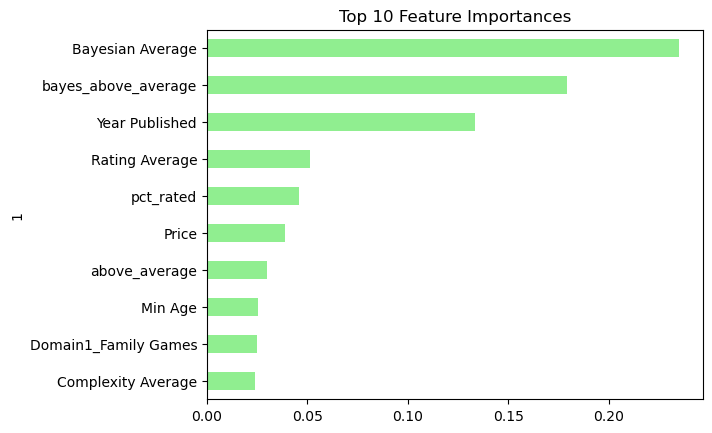

In [33]:
# Visualize the top 10 features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)

# Select the top 10 features
top_10_importances = importances_df.head(10)

# Sort and plot the top 10 features
top_10_importances_sorted = top_10_importances.sort_values(by='Feature Importances')
top_10_importances_sorted.plot(kind='barh', color='lightgreen', title='Top 10 Feature Importances', legend=False)